<a href="https://colab.research.google.com/github/NaNeNiNi7524/Machine-Learning-projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#import dataset
dataset = pd.read_csv('/content/car data.csv')
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [4]:
dataset['Seller_Type'].value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [5]:
sns.set()

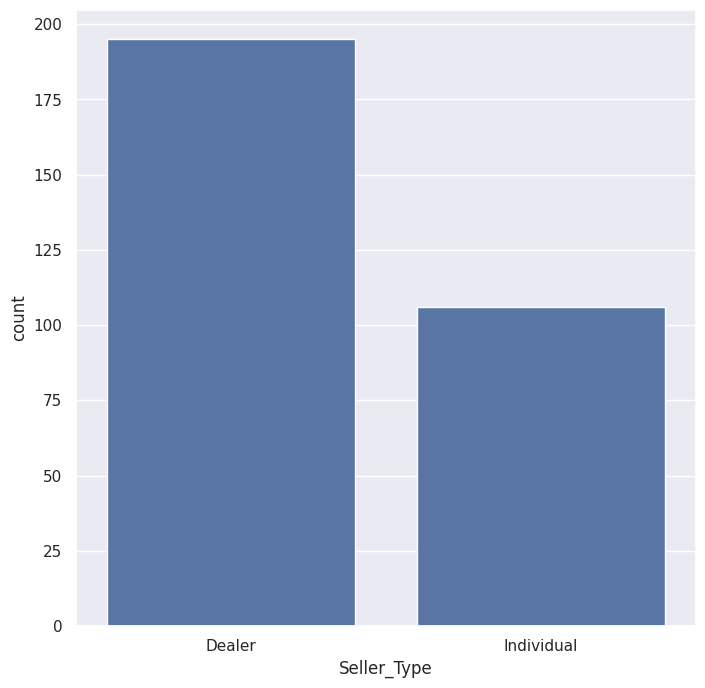

In [6]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'Seller_Type', data = dataset)
plt.show()

In [7]:
dataset['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


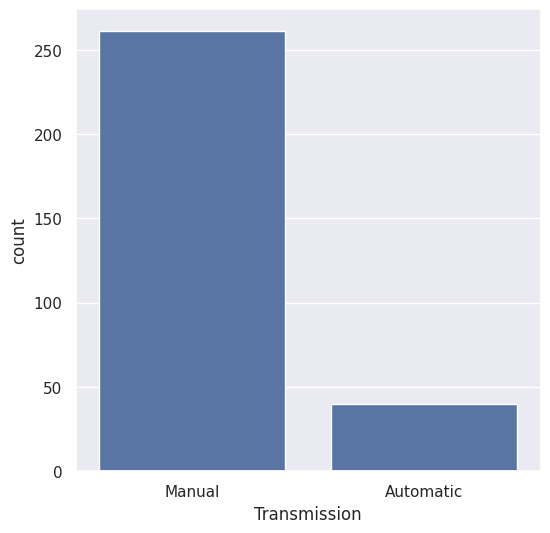

In [8]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Transmission',data = dataset)
plt.show()

In [9]:
dataset['Car_Name'].value_counts()

,count
Car_Name,
city,26
corolla altis,16
verna,14
fortuner,11
brio,10
...,...
Honda CB Trigger,1
Yamaha FZ S,1
Bajaj Pulsar 135 LS,1


In [10]:
dataset['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [11]:
dataset['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2},inplace = True)

<ipython-input-11-56ae2f2983ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2},inplace = True)
<ipython-input-11-56ae2f2983ee>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2},

In [12]:
dataset['Seller_Type'].replace({'Dealer':0,'Individual':1},inplace = True)

<ipython-input-12-222882bcd90d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Seller_Type'].replace({'Dealer':0,'Individual':1},inplace = True)
<ipython-input-12-222882bcd90d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Seller_Type'].replace({'Dealer':0,'Individual':1},inpl

In [13]:
dataset['Transmission'].replace({'Manual':0,'Automatic':1},inplace = True)

<ipython-input-13-aaa38b02f19e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Transmission'].replace({'Manual':0,'Automatic':1},inplace = True)
<ipython-input-13-aaa38b02f19e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Transmission'].replace({'Manual':0,'Automatic':1},inpl

In [16]:
dataset.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


In [15]:
dataset.drop(columns = ['Car_Name'],inplace = True)

In [17]:
X = dataset.drop(columns = 'Selling_Price')
Y = dataset['Selling_Price']

In [18]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [19]:
Y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, Y_train)


LinearRegression()

In [25]:
X_train_prediction = model.predict(X_train)
X_train_r2 = r2_score(X_train_prediction, Y_train)
print(X_train_r2)

0.8643014572598475


In [26]:
X_test_prediction = model.predict(X_test)
X_test_r2 = r2_score(X_test_prediction,Y_test)
print(X_test_r2)

0.8216459972993867


In [33]:
input_data = (2014,5.59,27000,0,0,0,0)
input_data_array = np.asarray(input_data)
input_data_array = input_data_array.reshape(1,-1)
prediction = model.predict(input_data_array)
print('$ ',prediction[0])

$  3.933876386185034


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
